In [15]:
"""
Script to preprocess and prepare the dataset used for training. Convert individual videos to npy files.
"""
import time
import cv2
import numpy as np
import os
import glob
import time
from datetime import datetime


In [34]:
# Dataset selected manually for class 0 and 1 
legit_fails = {'idapt518_sub253_DF_10-18-15', 'idapt524_sub255_DF_14-20-11', 'idapt524_sub255_DF_14-20-53',
               'idapt524_sub255_DF_14-24-11', 'idapt524_sub255_UF_14-21-17', 'idapt524_sub255_UF_14-21-55', 
               'idapt530_sub247_DF_11-19-37', 'idapt530_sub247_DF_11-20-09'}

new_fails = {'idapt518_sub253_UF_10-15-43', 'idapt518_sub253_UF_10-15-43', 'idapt518_sub253_DF_10-15-59',
             'idapt518_sub253_UF_10-16-27', 'idapt518_sub253_UF_10-18-02', 'idapt519_sub253_UF_10-28-17',
             'idapt519_sub253_DF_10-28-31', 'idapt519_sub253_UF_10-28-57', 'idapt519_sub253_UF_10-31-34',
             'idapt519_sub253_DF_10-32-00', 'idapt520_sub253_UF_10-43-15', 'idapt520_sub253_UF_10-44-16',
             'idapt520_sub253_DF_10-44-38', 'idapt520_sub253_UF_10-45-06', 'idapt520_sub253_DF_10-45-37',
             'idapt520_sub253_UF_10-46-10', 'idapt520_sub253_DF_10-46-35', 'idapt520_sub253_DF_10-47-38',
             'idapt520_sub253_UF_10-52-38', 'idapt520_sub253_UF_10-53-17', 'idapt518_sub263_DF_11-13-48', 
             'idapt518_sub263_DF_11-15-26', 'idapt518_sub263_DF_11-16-20', 'idapt519_sub263_UF_11-27-31',
             'idapt519_sub263_DF_11-27-51', 'idapt519_sub263_DF_11-27-51', 'idapt519_sub263_UF_11-28-23', 
             'idapt519_sub263_DF_11-28-42', 'idapt519_sub263_UF_11-29-15', 'idapt519_sub263_UF_11-30-30',
             'idapt519_sub263_DF_11-30-47', 'idapt519_sub263_DF_11-31-38', 'idapt519_sub263_UF_11-35-27', 
             'idapt519_sub263_DF_11-35-45', 'idapt520_sub263_UF_11-45-44', 'idapt520_sub263_DF_11-46-01',
             'idapt520_sub263_UF_11-46-24', 'idapt520_sub263_DF_11-46-47', 'idapt520_sub263_UF_11-47-19', 
             'idapt520_sub263_DF_11-47-42', 'idapt520_sub263_UF_11-48-16', 'idapt520_sub263_DF_11-48-32',
             'idapt520_sub263_DF_11-52-22', 'idapt518_sub265_DF_10-04-22', 'idapt518_sub265_DF_10-05-17', 
             'idapt518_sub265_DF_10-06-04', 'idapt519_sub265_DF_10-27-02'}

confounding_fails = {'idapt518_sub265_UF_10-04-06', 'idapt518_sub265_UF_10-04-53', 'idapt518_sub263_UF_11-15-09', 
                     'idapt518_sub263_DF_11-15-26', 'idapt518_sub263_UF_11-16-04', 'idapt518_sub263_UF_11-13-31',
                     'idapt518_sub265_UF_10-09-55', 'idapt519_sub265_UF_10-20-35', 'idapt519_sub265_UF_10-21-23', 
                     'idapt519_sub265_UF_10-25-33', 'idapt524_sub255_DF_14-22-09'}

legit_passes = {'idapt524_sub255_DP_14-18-30', 'idapt524_sub255_UP_14-15-48', 'idapt530_sub247_DP_11-12-17',
                'idapt524_sub245_DP_11-28-51', 'idapt518_sub264_UP_11-02-36', 'idapt524_sub255_DP_14-16-03',
                'idapt524_sub255_UP_14-16-38', 'idapt519_sub264_UP_11-15-36', 'idapt524_sub245_DP_11-30-18', 
                'idapt524_sub245_DP_11-26-27', 'idapt524_sub255_UP_14-14-47', 'idapt519_sub263_UP_11-25-45',
                'idapt519_sub264_UP_11-16-33', 'idapt524_sub255_DP_14-15-02', 'idapt524_sub245_UP_11-28-38',
                'idapt524_sub245_DP_11-25-38', 'idapt524_sub255_DP_14-23-30', 'idapt524_sub245_UP_11-26-13', 
                'idapt520_sub264_UP_11-29-47', 'idapt524_sub255_DP_14-17-43', 'idapt519_sub263_DP_11-25-06', 
                'idapt524_sub245_UP_11-25-25', 'idapt524_sub255_DP_14-19-23', 'idapt524_sub245_DP_11-28-03',
                'idapt520_sub264_UP_11-28-10', 'idapt530_sub247_DP_11-10-29', 'idapt519_sub264_UP_11-13-58', 
                'idapt519_sub264_UP_11-14-48', 'idapt524_sub245_UP_11-27-01', 'idapt524_sub245_DP_11-27-15',
                'idapt520_sub264_UP_11-28-59'}

confounding_passes = {'idapt524_sub245_DP_11-31-35', 'idapt524_sub245_DP_11-24-22', 'idapt530_sub247_UP_11-11-12',
                      'idapt524_sub245_DP_11-32-08', 'idapt524_sub245_DP_11-29-42', 'idapt520_sub264_UP_11-27-09', 
                      'idapt524_sub245_DP_11-33-46', 'idapt519_sub264_UP_11-13-08', 'idapt518_sub264_DP_10-58-22', 
                      'idapt519_sub263_DP_11-25-58', 'idapt524_sub245_DP_11-32-42', 'idapt524_sub245_DP_11-30-56', 
                      'idapt524_sub255_UP_14-18-17', 'idapt530_sub247_UP_11-10-14', 'idapt519_sub263_UP_11-23-59',
                      'idapt519_sub253_UP_10-22-44', 'idapt530_sub247_UP_11-12-03', 'idapt530_sub247_UP_11-13-41',
                      'idapt520_sub263_DP_11-41-28', 'idapt524_sub245_DP_11-34-11', 'idapt520_sub253_UP_10-36-14'}


print(len(new_fails), len(legit_passes))

sample = legit_fails.union(new_fails)
sample = sample.union(legit_passes)
temp = [f for f in os.listdir(r"C:\Users\kentw\OneDrive - University of Toronto\PycharmProjects\kinetics-i3d\data\MAA")]
temp = set([f.strip('.npy') for f in temp])
temp.difference(sample)

45 31


set()

In [17]:
# Define global variables
root_dir = "C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/"
video_folder = os.path.join(root_dir, "raw_data")  # Folder of MP4 Data
label_folder = os.path.join(root_dir, "data_annotation")

# Output folder and project directory 
output_folder = r"\data\MAA"
project = r"C:\Users\kentw\OneDrive - University of Toronto\PycharmProjects\kinetics-i3d"

dates = [f for f in os.listdir(video_folder)]
video_paths, label_paths = [os.path.join(video_folder, d) for d in dates], [os.path.join(label_folder, d) for d in dates]

# for x,y in zip(video_paths, label_paths):
#     print(x)
#     print(y)
#     print("\n")

In [18]:
# Mapping between sensor and video files
dates = [f for f in os.listdir(video_folder)]
video_paths, label_paths = [os.path.join(video_folder, d) for d in dates], [os.path.join(label_folder, d) for d in dates]

# Make a list of labels sort by date
# label/video paths differentiable by dates
# i-th folder denotes a certain date
for i in range(len(label_paths)):
    labels = glob.glob(label_paths[i] + "/*.mat")
    videos = glob.glob(video_paths[i] + "/*.mp4")
    labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))
    
    print('\nFinished one-to-one mapping for {}'.format(dates[i]))
    
    for x,y in zip(videos, labels):
        print(x)
        print(y)
        print('\n')



Finished one-to-one mapping for 2019-09-18
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-18\GOPR6123.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-18\idapt518_sub253_UP_10-10-52.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-18\GOPR6124.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-18\idapt518_sub253_DP_10-11-08.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-18\GOPR6125.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-18\idapt518_sub253_UP_10-11-56.mat


C:/Users/kentw/OneDrive - University o

In [33]:
# Make a list of labels sort by date
# label/video paths differentiable by dates
# i-th folder denotes a certain date
for i in range(len(label_paths)):
    labels = glob.glob(label_paths[i] + "/*.mat")
    videos = glob.glob(video_paths[i] + "/*.mp4")
    labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))
    
    for index, label in enumerate(labels) :
        
        filename = label.split('\\')[-1].rstrip('.mat')
        result = filename.split('_')[2][1]
        direction = filename.split('_')[2][0]
        
        # Remove outliers or add your constraints
        if result == 'U' or filename not in legit_passes:
            continue
            
        print(filename)
        
        cap = cv2.VideoCapture(videos[index])
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        position = length // 64
        res = np.zeros([64, 224, 224, 3]) # Initialize an empty numpy array
            
        while 1:
            ret, frame = cap.read()
            if not ret: break
                
            k = cv2.waitKey(0) & 0xff
            if k == 27:  # Esc button
                cv2.destroyAllWindows()
                break
                
            current_frame = int(cap.get(1)) - 1
            
            if current_frame % position == 0 and (current_frame // position) < 64:
                # Some image processing 
                # load the image and show it           
                frame = frame[:, :]
                frame = cv2.resize(frame, (224, 224))
                if direction == 'U':
                    frame = cv2.flip(frame, 1)
                im = np.array(frame)
                res[current_frame // position, :, :, :] = im
        
        # Save into npy. file
        file = os.path.join(project + output_folder, filename)
        # print(files)
        np.save(file, res)
        
        cap.release()
        cv2.destroyAllWindows()
    
print("\nDONE.")

idapt519_sub263_DP_11-25-06
idapt519_sub263_UP_11-25-45
idapt518_sub264_UP_11-02-36
idapt519_sub264_UP_11-13-58
idapt519_sub264_UP_11-14-48
idapt519_sub264_UP_11-15-36
idapt519_sub264_UP_11-16-33
idapt520_sub264_UP_11-28-10
idapt520_sub264_UP_11-28-59
idapt520_sub264_UP_11-29-47
idapt524_sub255_UP_14-14-47
idapt524_sub255_DP_14-15-02
idapt524_sub255_UP_14-15-48
idapt524_sub255_DP_14-16-03
idapt524_sub255_UP_14-16-38
idapt524_sub255_DP_14-17-43
idapt524_sub255_DP_14-18-30
idapt524_sub255_DP_14-19-23
idapt524_sub255_DP_14-23-30
idapt530_sub247_DP_11-10-29
idapt530_sub247_DP_11-12-17
idapt524_sub245_UP_11-25-25
idapt524_sub245_DP_11-25-38
idapt524_sub245_UP_11-26-13
idapt524_sub245_DP_11-26-27
idapt524_sub245_UP_11-27-01
idapt524_sub245_DP_11-27-15
idapt524_sub245_DP_11-28-03
idapt524_sub245_UP_11-28-38
idapt524_sub245_DP_11-28-51
idapt524_sub245_DP_11-30-18

DONE.


In [35]:
# Inspection
def data_inspection(data_set):    
    unqualified = set()
    for i in range(len(label_paths)):
        labels = glob.glob(label_paths[i] + "/*.mat")
        videos = glob.glob(video_paths[i] + "/*.mp4")
        labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))
        
        for index, label in enumerate(labels) :
            filename = label.split('\\')[-1].rstrip('.mat')
            if filename not in data_set: continue
            direction = filename.split('_')[2][0]

            print(filename)
            cap = cv2.VideoCapture(videos[index])
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            position = length // 64

            while 1:
                ret, frame = cap.read()
                if not ret: break

                k = cv2.waitKey(10) & 0xff
                if k == 27:  # Esc button
                    cv2.destroyAllWindows()
                    break
                elif k == ord(' '):
                    time.sleep(1)
                    unqualified.add(filename)

                current_frame = int(cap.get(1)) - 1
                if current_frame % position == 0 and (current_frame // position) < 64:  
                    frame = cv2.resize(frame, (512, 512))
                    if direction == 'U':
                        frame = cv2.flip(frame, 1)
                    cv2.imshow("Hello world", frame)

            cap.release()
            cv2.destroyAllWindows()
            
    return unqualified

data_inspection(legit_passes)

# Could not even get up:
# {'idapt518_sub253_UF_10-18-02', 'idapt520_sub253_UF_10-53-17', 'idapt520_sub253_UF_10-52-38'}

idapt519_sub263_DP_11-25-06
idapt519_sub263_UP_11-25-45
idapt518_sub264_UP_11-02-36
idapt519_sub264_UP_11-13-58
idapt519_sub264_UP_11-14-48
idapt519_sub264_UP_11-15-36
idapt519_sub264_UP_11-16-33
idapt520_sub264_UP_11-28-10
idapt520_sub264_UP_11-28-59
idapt520_sub264_UP_11-29-47
idapt524_sub255_UP_14-14-47
idapt524_sub255_DP_14-15-02
idapt524_sub255_UP_14-15-48
idapt524_sub255_DP_14-16-03
idapt524_sub255_UP_14-16-38
idapt524_sub255_DP_14-17-43
idapt524_sub255_DP_14-18-30
idapt524_sub255_DP_14-19-23
idapt524_sub255_DP_14-23-30
idapt530_sub247_DP_11-10-29
idapt530_sub247_DP_11-12-17
idapt524_sub245_UP_11-25-25
idapt524_sub245_DP_11-25-38
idapt524_sub245_UP_11-26-13
idapt524_sub245_DP_11-26-27
idapt524_sub245_UP_11-27-01
idapt524_sub245_DP_11-27-15
idapt524_sub245_DP_11-28-03
idapt524_sub245_UP_11-28-38
idapt524_sub245_DP_11-28-51
idapt524_sub245_DP_11-30-18


set()

In [24]:
# Find out the length of the longest video
videos = glob.glob(video_folder + "/*/*.mp4" , recursive = True)
longest, acc, list = 0, 0, []

# longest: the number of frames in the longest video
# acc: number of videos satisfying the citeria
# list: the list of videos corresponding to acc

for f in videos:
    cap = cv2.VideoCapture(f)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if 128 < length <= 160: 
        acc+=1
        list.append(f)
    if length > longest:
        longest = length

KeyboardInterrupt: 

Third Quantile：272.0


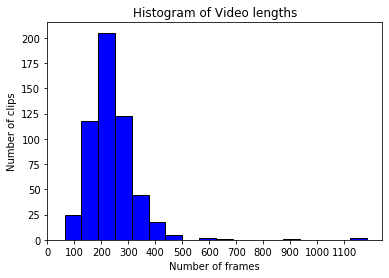

In [50]:
# matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(acc, color = 'blue', edgecolor = 'black',
         bins = int(180/10))

third_quantile = np.percentile(acc, 75)
print('Third Quantile：{}'.format(third_quantile))

# Add labels
plt.title('Histogram of Video lengths')
plt.xlabel('Number of frames')
plt.ylabel('Number of clips')
x = range(0, 1200, 100)
plt.xticks(x)
plt.show()